# Pré Processamento

Nessa etapa vamos preparar nosso conjunto de dados para nossas análises e modelagem.

Vamos aplicar limpeza e transformações nos dados.

## Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Carregando o conjunto de dados

Aqui vamos carregar nosso conjunto de dados que extraimos com o webcrawler.

In [58]:
# Carregando o conjunto de dados e salvando na variável 'imoveis'.
imoveis = pd.read_excel('imoveis_full.xlsx')

# Vamos tirar a coluna 'Unnamed: 0' pois a mesma não apresenta informação nenhuma
imoveis = imoveis.drop(['Unnamed: 0'], axis=1)

In [59]:
pd.set_option('display.max_columns', 100)

# Verificando o dataset
imoveis.head()

,Link,Estado,Cidade,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Características,Descrição
0,-apartamento-3-quartos-com-elevador-funcionari...,mg,belo horizonte,3250.0,700.0,0.0,75.0,3.0,2.0,2.0,['Elevador'],"Codigo do Imóvel: 4058 - NOVO, ÓTIMA LOCALIAZA..."
1,-apartamento-2-quartos-com-piscina-lourdes-bel...,mg,belo horizonte,4800.0,1100.0,0.0,70.0,2.0,2.0,1.0,"['Área de serviço', 'Armário na cozinha', 'Ele...",Codigo do Imóvel: 4036 - PRÉDIO REVESTIDO EM G...
2,-apartamento-4-quartos-com-academia-serra-belo...,mg,belo horizonte,7300.0,3300.0,1100.0,190.0,4.0,4.0,5.0,"['Academia', 'Interfone', 'Jardim', 'Playgroun...",Excelente localização próximo ao Minas Tênis C...
3,-apartamento-2-quartos-com-piscina-santo-agost...,mg,belo horizonte,3100.0,856.0,290.0,60.0,2.0,2.0,2.0,"['Academia', 'Churrasqueira', 'Condomínio fech...",Prédio moderno; apartamento nunca habitado; 2 ...
4,-apartamento-3-quartos-cidade-nova-belo-horizo...,mg,belo horizonte,1500.0,280.0,160.0,110.0,3.0,2.0,3.0,"['Área de serviço', 'Interfone', 'Salão de fes...",Alugo apartamento amplo com duas salas separad...


In [60]:
imoveis.shape

(25695, 12)

Nossa base de dados conta com um pouco mais de 25 mil observações e 12 colunas inicialmente.

## Limpeza e transformações

Nessa etapa vamos aplicar limpeza e transformações para deixar nosso conjunto de dados o mais consistente possível.

#### Tirando os valores NaN's

In [61]:
pd.set_option('display.max_rows', 100)
imoveis.head(7)

,Link,Estado,Cidade,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Características,Descrição
0,-apartamento-3-quartos-com-elevador-funcionari...,mg,belo horizonte,3250.0,700.0,0.0,75.0,3.0,2.0,2.0,['Elevador'],"Codigo do Imóvel: 4058 - NOVO, ÓTIMA LOCALIAZA..."
1,-apartamento-2-quartos-com-piscina-lourdes-bel...,mg,belo horizonte,4800.0,1100.0,0.0,70.0,2.0,2.0,1.0,"['Área de serviço', 'Armário na cozinha', 'Ele...",Codigo do Imóvel: 4036 - PRÉDIO REVESTIDO EM G...
2,-apartamento-4-quartos-com-academia-serra-belo...,mg,belo horizonte,7300.0,3300.0,1100.0,190.0,4.0,4.0,5.0,"['Academia', 'Interfone', 'Jardim', 'Playgroun...",Excelente localização próximo ao Minas Tênis C...
3,-apartamento-2-quartos-com-piscina-santo-agost...,mg,belo horizonte,3100.0,856.0,290.0,60.0,2.0,2.0,2.0,"['Academia', 'Churrasqueira', 'Condomínio fech...",Prédio moderno; apartamento nunca habitado; 2 ...
4,-apartamento-3-quartos-cidade-nova-belo-horizo...,mg,belo horizonte,1500.0,280.0,160.0,110.0,3.0,2.0,3.0,"['Área de serviço', 'Interfone', 'Salão de fes...",Alugo apartamento amplo com duas salas separad...
5,-apartamento-2-quartos-barro-preto-belo-horizo...,mg,belo horizonte,2400.0,545.0,260.0,80.0,2.0,2.0,2.0,NaN,BAIRRO BARRO PRETOIMÓVEL: APARTAMENTO 704DESCR...
6,-apartamento-2-quartos-com-piscina-savassi-bel...,mg,belo horizonte,2800.0,897.0,555.0,72.0,2.0,2.0,3.0,"['Academia', 'Área de serviço', 'Churrasqueira...","Savassi - 02 quartos, 02 suítes, 02 vagas de g..."


Uma coluna muito importante do nosso dataset é a de "Características", é onde vamos extrair algumas características físicas de cada imóvel e como podemos perceber na tabela acima tem alguns imóveis que não tinham informações nenhuma em características no site para extrair, por esse motivo vamos excluir esse imóvel pois nossa análise necessita de características.

Vamos verificar a quantidade de dados faltantes com a função isnull().

In [62]:
imoveis.isnull().sum()

Link                   0
Estado                 0
Cidade                 0
Valor_aluguel        760
Valor_condomínio     760
Valor_iptu           760
Área_total           760
Qt_quartos           760
Qt_vagas             760
Qt_banheiros         760
Características     5973
Descrição            876
dtype: int64

São 5973 imóveis que não tem características, vamos tirar todos os dados faltantes para não correr o risto de ter divergência no nosso modelo.

Outra coluna de muita importancia e que não pode conter valores faltantes é a "Valor_aluguel" que é nossa variável target, é com ela que vamos fazer as previsões.

Provavelmente esses valores estão vazio devido quando rodamos o webcrawler para buscar em cada página as informações, o imóvel já tinha saído do site, então o crawler não conseguiu puxar as informações.

In [63]:
# Removendo todos os dados faltantes com a função dropna()
imoveis.dropna(inplace=True)

In [64]:
imoveis.isnull().sum()

Link                0
Estado              0
Cidade              0
Valor_aluguel       0
Valor_condomínio    0
Valor_iptu          0
Área_total          0
Qt_quartos          0
Qt_vagas            0
Qt_banheiros        0
Características     0
Descrição           0
dtype: int64

In [65]:
imoveis.shape

(19623, 12)

In [66]:
# Resetando o index
imoveis = imoveis.reset_index(drop=True)

Tiramos aproximadamente 23% dos nossos dados, infelizmente perdemos uma quantidade grande, como estavam vazia nossas duas principais variáveis 'Valor_aluguel' e as variáveis de caracteristicas dos imóveis não tivemos outra escolha além de tira-lás.

Existem algumas técnicas para preencher os dados faltantes, como por exemplo, poderiamos ter preenchido os valores faltantes com a média da coluna ou pelo valor da coluna de cima ou de baixo, não existe uma regra e cada caso é diferente um do outro mas para evitarmos o enviesamento da nossa análise nesse caso visto que onde está vazio é uma grande variedade de informação foi melhor tirar os dados faltantes.

#### Extraindo informações da coluna características

In [70]:
imoveis.head(1)

,Link,Estado,Cidade,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Características,Descrição
0,-apartamento-3-quartos-com-elevador-funcionari...,mg,belo horizonte,3250.0,700.0,0.0,75.0,3.0,2.0,2.0,['Elevador'],"Codigo do Imóvel: 4058 - NOVO, ÓTIMA LOCALIAZA..."


Como podemos ver no dataset as informações da coluna característica está em uma lista, nossa análise e modelo não vão conseguir usar essas informações com essa formatação, então vamos ter que extrair cada tipo de característica e transformar em uma coluna colocando valores do tipo 1 para sim, esse imóvel tem essa característica e 0 não, esse imóvel não tem essa característica.

A maioria dos algoritmos de machine learning não trabalham com dados categóricos, não aceitam esses dados como entrada no modelo, por isso precisamos converter as variáveis categórica em valores numéricos.

Vejamos abaixo:

In [71]:
colunas_de_caracteristicas = {
    
    "Academia" : "Academia",
    "Acesso_para_deficientes" : "Acesso para deficientes",
    "Ar_condicionado" : "Ar-condicionado",
    "Área_de_serviço" : "Área de serviço",
    "Armário_embutido" : "Armário embutido",
    "Armário_na_cozinha" : "Armário na cozinha",
    "Bicicletário" : "Bicicletário",
    "Churrasqueira" : "Churrasqueira",
    "Circuito_de_segurança" : "Circuito de segurança",
    "Conexão_à_internet" : "Conexão à internet",
    "Elevador" : "Elevador",
    "Espaço_gourmet" : "Espaço gourmet",
    "Garagem" : "Garagem",
    "Interfone" : "Interfone",
    "Lavanderia" : "Lavanderia",
    "Mobiliado" : "Mobiliado",
    "Piscina" : "Piscina",
    "Playground" : "Playground",
    "Quadra_de_tênis" : "Quadra de tênis",
    "Quadra_poliesportiva" : "Quadra poliesportiva",
    "Salão_de_festas" : "Salão de festas",
    "Sauna" : "Sauna",
    "Segurança_24h" : "Segurança 24h",
    "Sistema_de_alarme" : "Sistema de alarme",
    "Spa" : "Spa",
    "Varanda" : "Varanda"
}

for i in colunas_de_caracteristicas:
    imoveis[i] = None

for k,v in colunas_de_caracteristicas.items():
    for i in range(0,len(imoveis)):
        if imoveis['Características'][i] != None:
            imoveis[k][i] = 1 if v in imoveis['Características'][i] else 0

Nesse código acima foi criado as colunas com cada tipo de característica e depois foi validado e preenchido com o 1 e 0 em cada coluna se a característica da mesma apresentava na lista da coluna "Características".

In [75]:
imoveis.head(1)

,Link,Estado,Cidade,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Características,Descrição,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
0,-apartamento-3-quartos-com-elevador-funcionari...,mg,belo horizonte,3250.0,700.0,0.0,75.0,3.0,2.0,2.0,['Elevador'],"Codigo do Imóvel: 4058 - NOVO, ÓTIMA LOCALIAZA...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
imoveis.shape

(19623, 38)

Feito as devidas transformações da coluna "Características", podemos tirar a coluna pois as informações que estavam nela já está transposta em todo dataset.

In [76]:
# Removendo a coluna Características
imoveis = imoveis.drop(['Características'], axis=1)

In [78]:
imoveis.shape

(19623, 37)

In [99]:
# Transformando as colunas de características que estavam com o dtypes 'object' para 'int'
imoveis[['Academia', 'Acesso_para_deficientes', 'Ar_condicionado',
       'Área_de_serviço', 'Armário_embutido', 'Armário_na_cozinha',
       'Bicicletário', 'Churrasqueira', 'Circuito_de_segurança',
       'Conexão_à_internet', 'Elevador', 'Espaço_gourmet', 'Garagem',
       'Interfone', 'Lavanderia', 'Mobiliado', 'Piscina', 'Playground',
       'Quadra_de_tênis', 'Quadra_poliesportiva', 'Salão_de_festas', 'Sauna',
       'Segurança_24h', 'Sistema_de_alarme', 'Spa', 'Varanda']] = imoveis[['Academia', 'Acesso_para_deficientes', 'Ar_condicionado',
       'Área_de_serviço', 'Armário_embutido', 'Armário_na_cozinha',
       'Bicicletário', 'Churrasqueira', 'Circuito_de_segurança',
       'Conexão_à_internet', 'Elevador', 'Espaço_gourmet', 'Garagem',
       'Interfone', 'Lavanderia', 'Mobiliado', 'Piscina', 'Playground',
       'Quadra_de_tênis', 'Quadra_poliesportiva', 'Salão_de_festas', 'Sauna',
       'Segurança_24h', 'Sistema_de_alarme', 'Spa', 'Varanda']].astype(int)

In [102]:
imoveis.shape

(19623, 37)

In [104]:
imoveis.head(1)

,Link,Estado,Cidade,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Descrição,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
0,-apartamento-3-quartos-com-elevador-funcionari...,mg,belo horizonte,3250.0,700.0,0.0,75.0,3.0,2.0,2.0,"Codigo do Imóvel: 4058 - NOVO, ÓTIMA LOCALIAZA...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Verificando quais são os tipos de cada coluna

In [106]:
# Verificando os tipos estruturais de cada coluna
imoveis.dtypes

Link                        object
Estado                      object
Cidade                      object
Valor_aluguel              float64
Valor_condomínio           float64
Valor_iptu                 float64
Área_total                 float64
Qt_quartos                 float64
Qt_vagas                   float64
Qt_banheiros               float64
Descrição                   object
Academia                     int32
Acesso_para_deficientes      int32
Ar_condicionado              int32
Área_de_serviço              int32
Armário_embutido             int32
Armário_na_cozinha           int32
Bicicletário                 int32
Churrasqueira                int32
Circuito_de_segurança        int32
Conexão_à_internet           int32
Elevador                     int32
Espaço_gourmet               int32
Garagem                      int32
Interfone                    int32
Lavanderia                   int32
Mobiliado                    int32
Piscina                      int32
Playground          

## Removendo os possíveis outliers

Outliers indicam possíveis valores discrepantes, é uma observação que se diferencia muito das demais observações e pode prejudicar não apenas cálculos de estatística descritiva, como média e mediana, por exemplo, mas afeta também a calibração de modelos preditivos.

Vejamos abaixo uma análise descritiva com e sem os possíveis outliers.

##### -> Sem tratamento dos outliers

In [107]:
# Tirando estatísticas descritivas
pd.set_option('float_format', '{:f}'.format)
imoveis.describe()

,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
count,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000
mean,2617.868318,490.388473,319.088926,81.436987,2.242369,1.217092,1.840340,0.198237,0.005911,0.217347,0.430617,0.104724,0.155379,0.002701,0.358814,0.096723,0.043062,0.523213,0.120879,0.105743,0.376548,0.062427,0.188198,0.396015,0.297865,0.017989,0.181878,0.409112,0.120369,0.074861,0.063497,0.024818,0.239566
std,17056.961513,3163.418719,7661.916623,75.150117,0.836352,0.930113,1.003936,0.398682,0.076660,0.412451,0.495175,0.306205,0.362275,0.051901,0.479665,0.295588,0.203001,0.499474,0.325994,0.307517,0.484532,0.241935,0.390880,0.489080,0.457331,0.132915,0.385754,0.491682,0.325401,0.263174,0.243861,0.155574,0.426829
min,95.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1180.000000,120.000000,0.000000,54.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1700.000000,400.000000,55.000000,70.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2500.000000,648.000000,150.000000,93.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1150000.000000,390000.000000,801720.000000,5000.000000,20.000000,30.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos ver que o desvio padrão e o valor máximo de algumas variáveis está absurdamente grande, significa que nossos dados estão espalhados por uma ampla gama de valores e isso pode ser dados descrepantes ou como são chamados "outliers"

##### -> Com tratamento dos outliers

##### Tirando o outlier da variável "Valor_aluguel"

In [108]:
imoveis.shape

(19623, 37)

In [109]:
imoveis['Valor_aluguel'].sort_values().tail(30)

9794      73100.000000
5040      80000.000000
18921    115000.000000
5858     150000.000000
5853     168000.000000
3728     170000.000000
1801     200000.000000
9923     205000.000000
852      210000.000000
1775     210000.000000
17818    220000.000000
5101     222500.000000
14428    239000.000000
18749    250000.000000
13585    250000.000000
19523    280000.000000
15352    295000.000000
14397    315000.000000
18331    320000.000000
16513    330000.000000
8637     350000.000000
15474    390000.000000
18464    400000.000000
158      480000.000000
19030    540000.000000
5877     695000.000000
17755    710000.000000
6463     780000.000000
8617     890000.000000
17791   1150000.000000
Name: Valor_aluguel, dtype: float64

Aqui eu estou ordenando os valores da nossa variável 'Valor_aluguel' para ver os maiores valores da coluna e de cara já podemos ver valores muito descrepante.

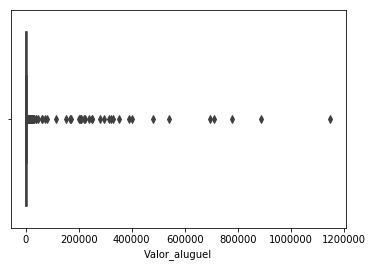

In [110]:
sns.boxplot(x='Valor_aluguel', data=imoveis)

Esse gráfico de boxplot mostra que nossa variável target 'Valor_aluguel' apresenta dados com uma variação muito grande, vamos tirar esses dados descrepantes.

Uma forma de detectar outliers é através da faixa interquartil (FIQ), que é a diferença entre o terceiro e o primeiro quartil. Uma regra muito utilizada é que um outlier está no intervalo menor que 1.5 FIQ do primeiro quartil ou maior que 1.5 FIQ do terceiro quartil.

Cálculo:

Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)

Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

<b> Aplicando o cálculo para tirarmos os outliers: <b>

In [111]:
primeiro_quartil_aluguel = imoveis["Valor_aluguel"].quantile(0.25)
terceiro_quartil_aluguel = imoveis["Valor_aluguel"].quantile(0.75)

Limite_Inferior_aluguel = primeiro_quartil_aluguel - 1.5 * (terceiro_quartil_aluguel - primeiro_quartil_aluguel)
Limite_Superior_aluguel = terceiro_quartil_aluguel + 1.5 * (terceiro_quartil_aluguel - primeiro_quartil_aluguel)

print("Valor do limite inferior da variável Valor_aluguel: ", Limite_Inferior_aluguel)
print("Valor do limite superior da variável Valor_aluguel: ", Limite_Superior_aluguel)

Valor do limite inferior da variável Valor_aluguel:  -800.0
Valor do limite superior da variável Valor_aluguel:  4480.0


Os valores que encontramos significa que nossos outlier são valores abaixo de 880 e acima de 4480. Porém vamos considerar o limite inferior somente com o valor de 350, pois por mais que possamos enviesar nossa análise é um valor mais realista a condição do problema porque é difícil encontrar aluguel de apartamento nas capitais com valor abaixo de 350.

Proximo passo então é remover os valores da nossa base de dados em que o valor da variável 'Valor_aluguel' seja abaixo de 350 e acima de 4480.

In [112]:
quartil_low  = 350
quartil_high  = Limite_Superior_aluguel

imoveis_sem_outlier = imoveis[(imoveis["Valor_aluguel"] > quartil_low) & (imoveis["Valor_aluguel"] < quartil_high)]
imoveis_sem_outlier.shape

(18396, 37)

In [113]:
round(((imoveis.shape[0] - imoveis_sem_outlier.shape[0]) / imoveis.shape[0])*100, 2)

6.25

Depois de tirar os valores outliers, nossa base de dados tinha 19623 e agora tem 18396, uma perca de somente 6,25%.

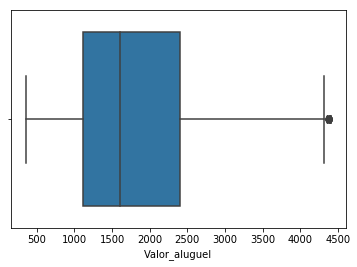

In [114]:
sns.boxplot(x='Valor_aluguel', data=imoveis_sem_outlier)

Veja a diferença desse novo gráfico bloxplot em relação ao primeiro boxplot que fizemos um pouco mais a cima, agora podemos ver melhor a distribuição dos dados no gráfico.

In [115]:
imoveis_sem_outlier.head()

,Link,Estado,Cidade,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Descrição,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
0,-apartamento-3-quartos-com-elevador-funcionari...,mg,belo horizonte,3250.000000,700.000000,0.000000,75.000000,3.000000,2.000000,2.000000,"Codigo do Imóvel: 4058 - NOVO, ÓTIMA LOCALIAZA...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-apartamento-2-quartos-com-piscina-santo-agost...,mg,belo horizonte,3100.000000,856.000000,290.000000,60.000000,2.000000,2.000000,2.000000,Prédio moderno; apartamento nunca habitado; 2 ...,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-apartamento-3-quartos-cidade-nova-belo-horizo...,mg,belo horizonte,1500.000000,280.000000,160.000000,110.000000,3.000000,2.000000,3.000000,Alugo apartamento amplo com duas salas separad...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,-apartamento-2-quartos-com-piscina-savassi-bel...,mg,belo horizonte,2800.000000,897.000000,555.000000,72.000000,2.000000,2.000000,3.000000,"Savassi - 02 quartos, 02 suítes, 02 vagas de g...",1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
6,-apartamento-2-quartos-com-piscina-ouro-preto-...,mg,belo horizonte,1300.000000,399.000000,100.000000,60.000000,2.000000,1.000000,2.000000,"Apartamento com linda vista, ventilado, cozinh...",1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0


In [116]:
imoveis_sem_outlier.describe()

,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
count,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000
mean,1805.469885,447.066156,295.564471,76.467765,2.194336,1.156393,1.740759,0.185910,0.005599,0.197543,0.427158,0.106925,0.156230,0.002555,0.346380,0.092846,0.038758,0.517504,0.111057,0.107523,0.375516,0.059687,0.177158,0.380300,0.286801,0.014188,0.171559,0.400467,0.108339,0.074255,0.060230,0.020548,0.226354
std,870.923442,2930.200617,7893.982942,71.586671,0.791098,0.880987,0.866541,0.389045,0.074619,0.398156,0.494679,0.309027,0.363083,0.050483,0.475829,0.290225,0.193024,0.499707,0.314211,0.309786,0.484269,0.236912,0.381813,0.485474,0.452280,0.118268,0.377007,0.490006,0.310816,0.262193,0.237920,0.141869,0.418482
min,355.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1110.000000,150.000000,0.000000,53.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1600.000000,392.000000,55.000000,69.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2400.000000,607.000000,147.000000,90.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4400.000000,390000.000000,801720.000000,5000.000000,5.000000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Agora podemos ver que até a média se aproximou mais do valor da mediana e o desvio padrão baixou consideravelmente.

Podemos ver um outro caso de outlier que está na variável "Valor_iptu", veja que o valor de iptu de um imóvel de locação do tipo apartamento provavelmente não pode ser igual a 801720.

Abaixo vamos tratar esse outlier igual tratamos o da variável "Valor_aluguel".

##### Tirando o outlier da variável "Valor_iptu"

In [117]:
imoveis_sem_outlier['Valor_iptu'].sort_values().tail(30)

19123    15657.000000
19120    15657.000000
19124    15687.000000
19108    15719.000000
19161    15744.000000
19106    15749.000000
19109    15782.000000
18897    15782.000000
19104    15812.000000
18896    15845.000000
18948    15859.000000
19105    15875.000000
18966    15883.000000
19103    15907.000000
19107    15937.000000
13958    17208.000000
19168    18149.000000
18995    18574.000000
2300     18715.000000
18992    22966.000000
19197    24201.000000
19137    30905.000000
10631    34502.000000
19192    36426.000000
2902     74360.000000
14919    79050.000000
6497     98500.000000
17643   211000.000000
1930    650000.000000
8939    801720.000000
Name: Valor_iptu, dtype: float64

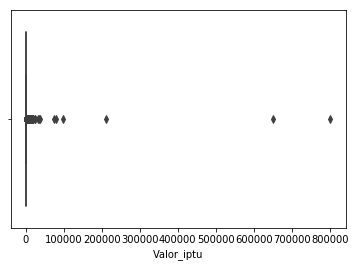

In [118]:
sns.boxplot(x='Valor_iptu', data=imoveis_sem_outlier)

In [120]:
primeiro_quartil_iptu = imoveis_sem_outlier["Valor_iptu"].quantile(0.25)
terceiro_quartil_iptu = imoveis_sem_outlier["Valor_iptu"].quantile(0.75)

Limite_Inferior_iptu = primeiro_quartil_iptu - 1.5 * (terceiro_quartil_iptu - primeiro_quartil_iptu)
Limite_Superior_iptu = terceiro_quartil_iptu + 1.5 * (terceiro_quartil_iptu - primeiro_quartil_iptu)

print("Valor do limite inferior: ", Limite_Inferior_iptu)
print("Valor do limite superior: ", Limite_Superior_iptu)

Valor do limite inferior:  -220.5
Valor do limite superior:  367.5


No caso da variável "Valor_iptu" não vamos tirar os outliers do limite inferior, pois vamos usar um pouco a lógica... Tem pessoas que não cobram nenhum iptu ou seja "iptu igual a 0" na nossa variável e se tirarmos os outliers com o limite inferior todos os imóveis abaixo de 220 serão excluídos.

In [122]:
quartil_high_iptu  = Limite_Superior_iptu

imoveis_sem_outlier_2 = imoveis_sem_outlier[imoveis_sem_outlier["Valor_iptu"] < quartil_high_iptu]
imoveis_sem_outlier_2.shape

(16852, 37)

In [123]:
round(((imoveis_sem_outlier.shape[0] - imoveis_sem_outlier_2.shape[0]) / imoveis_sem_outlier.shape[0])*100, 2)

8.39

Ao tirar os valores outliers da variável "Valor_iptu", nossa base de dados tinha 18396 e agora tem 16852, uma perca de 8,4%.

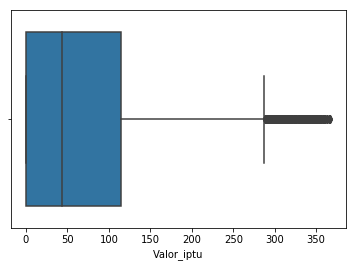

In [125]:
sns.boxplot(x='Valor_iptu', data=imoveis_sem_outlier_2)

In [126]:
imoveis_sem_outlier_2.describe()

,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
count,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000,16852.000000
mean,1783.476205,426.381201,69.928614,75.072988,2.172442,1.136542,1.705970,0.181165,0.004629,0.195941,0.416924,0.111025,0.159803,0.002136,0.341918,0.089960,0.038334,0.515488,0.104795,0.104023,0.373309,0.060052,0.179741,0.375267,0.281569,0.013352,0.166271,0.393722,0.106100,0.069665,0.059399,0.020116,0.219796
std,854.527660,3057.223840,85.708095,73.330392,0.785260,0.886765,0.835751,0.385167,0.067878,0.396935,0.493065,0.314173,0.366434,0.046172,0.474366,0.286132,0.192006,0.499775,0.306298,0.305300,0.483697,0.237591,0.383983,0.484206,0.449778,0.114778,0.372335,0.488589,0.307975,0.254590,0.236378,0.140402,0.414121
min,355.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1100.000000,80.000000,0.000000,52.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1600.000000,380.000000,43.000000,68.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2300.000000,600.000000,115.000000,87.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4400.000000,390000.000000,367.000000,5000.000000,5.000000,30.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Tirando o outlier da variável "Valor_condomínio"

In [127]:
imoveis_sem_outlier_2['Valor_condomínio'].sort_values().tail(30)

6912      1815.000000
7479      1850.000000
10243     1900.000000
3003      1940.000000
6406      1940.000000
17546     1950.000000
6342      1968.000000
3692      1971.000000
3604      2000.000000
3730      2000.000000
3669      2000.000000
3742      2000.000000
3153      2000.000000
7675      2000.000000
3914      2000.000000
3748      2000.000000
7487      2112.000000
16015     2150.000000
3731      2200.000000
7491      2215.000000
3544      2300.000000
8630      2400.000000
8628      2400.000000
3689      2500.000000
3492      2700.000000
3745      2900.000000
7492      2925.000000
3749      3500.000000
2266     62250.000000
3793    390000.000000
Name: Valor_condomínio, dtype: float64

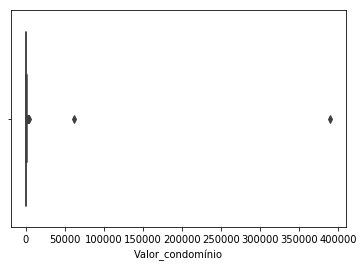

In [128]:
sns.boxplot(x='Valor_condomínio', data=imoveis_sem_outlier_2)

In [130]:
primeiro_quartil_condominio = imoveis_sem_outlier_2["Valor_condomínio"].quantile(0.25)
terceiro_quartil_condominio = imoveis_sem_outlier_2["Valor_condomínio"].quantile(0.75)

Limite_Inferior_condominio = primeiro_quartil_condominio - 1.5 * (terceiro_quartil_condominio - primeiro_quartil_condominio)
Limite_Superior_condominio = terceiro_quartil_condominio + 1.5 * (terceiro_quartil_condominio - primeiro_quartil_condominio)

print("Valor do limite inferior: ", Limite_Inferior_condominio)
print("Valor do limite superior: ", Limite_Superior_condominio)

Valor do limite inferior:  -700.0
Valor do limite superior:  1380.0


In [131]:
quartil_high_condominio  = Limite_Superior_condominio

imoveis_sem_outlier_3 = imoveis_sem_outlier_2[imoveis_sem_outlier_2["Valor_condomínio"] < quartil_high_condominio]
imoveis_sem_outlier_3.shape

(16692, 37)

Igualmente no caso da variável "Valor_iptu" essa variável "Valor_condomínio" não vamos tirar os outliers com o limite inferior

In [132]:
round(((imoveis_sem_outlier_2.shape[0] - imoveis_sem_outlier_3.shape[0]) / imoveis_sem_outlier_2.shape[0])*100, 2)

0.95

Ao tirar os valores outliers da variável "Valor_condomínio", nossa base de dados tinha 16852 e agora tem 16692, uma perca de 0,95%.

In [133]:
imoveis_sem_outlier_3['Valor_condomínio'].sort_values().tail(30)

5916    1323.000000
1532    1324.000000
9788    1329.000000
6237    1330.000000
7336    1330.000000
2242    1330.000000
5038    1331.000000
19600   1335.000000
19592   1335.000000
9976    1342.000000
7073    1345.000000
18308   1350.000000
7085    1350.000000
15640   1350.000000
9124    1350.000000
6130    1350.000000
9989    1350.000000
7401    1350.000000
8884    1350.000000
18547   1350.000000
9901    1350.000000
16160   1350.000000
6431    1358.000000
3387    1360.000000
9406    1365.000000
7243    1366.000000
6539    1368.000000
468     1372.000000
4153    1374.000000
6421    1375.000000
Name: Valor_condomínio, dtype: float64

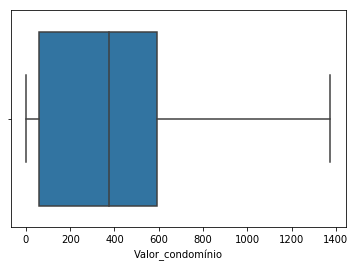

In [134]:
sns.boxplot(x='Valor_condomínio', data=imoveis_sem_outlier_3)

In [135]:
imoveis_sem_outlier_3.describe()

,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
count,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000
mean,1774.012102,387.586029,69.153607,74.248742,2.164031,1.128984,1.693027,0.180266,0.004613,0.194824,0.416307,0.111550,0.160556,0.002037,0.341361,0.089564,0.038521,0.514318,0.104541,0.104541,0.372933,0.059190,0.179966,0.373412,0.280733,0.013300,0.165169,0.392344,0.105380,0.069614,0.059250,0.020010,0.218188
std,848.166410,312.042122,84.587738,72.833459,0.778927,0.881965,0.814871,0.384420,0.067764,0.396077,0.492961,0.314822,0.367132,0.045087,0.474181,0.285564,0.192457,0.499810,0.305970,0.305970,0.483599,0.235987,0.384171,0.483725,0.449371,0.114559,0.371344,0.488287,0.307051,0.254503,0.236099,0.140037,0.413028
min,355.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1100.000000,60.000000,0.000000,52.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1600.000000,375.000000,43.000000,67.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2300.000000,590.000000,114.000000,86.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4400.000000,1375.000000,367.000000,5000.000000,5.000000,30.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Tirando o outlier da variável "Área_total"

In [140]:
imoveis_sem_outlier_3['Área_total'].sort_values().tail(30)

19375    265.000000
18120    266.000000
8478     267.000000
19140    269.000000
19371    270.000000
18498    270.000000
2242     275.000000
3881     278.000000
349      280.000000
19170    280.000000
3625     294.000000
1733     300.000000
19206    300.000000
1729     300.000000
17499    300.000000
1715     300.000000
8548     320.000000
43       360.000000
7481     360.000000
7680     390.000000
7661     400.000000
7585     400.000000
7677     400.000000
2241     468.000000
3807     642.000000
19381   1350.000000
2903    3257.000000
2956    3700.000000
8410    4776.000000
2000    5000.000000
Name: Área_total, dtype: float64

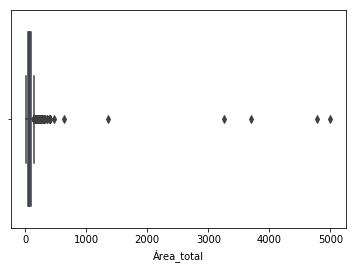

In [141]:
sns.boxplot(x='Área_total', data=imoveis_sem_outlier_3)

In [143]:
primeiro_quartil_areaTotal = imoveis_sem_outlier_3["Área_total"].quantile(0.25)
terceiro_quartil_areaTotal = imoveis_sem_outlier_3["Área_total"].quantile(0.75)

Limite_Inferior_areaTotal = primeiro_quartil_areaTotal - 1.5 * (terceiro_quartil_areaTotal - primeiro_quartil_areaTotal)
Limite_Superior_areaTotal = terceiro_quartil_areaTotal + 1.5 * (terceiro_quartil_areaTotal - primeiro_quartil_areaTotal)

print("Valor do limite inferior: ", Limite_Inferior_areaTotal)
print("Valor do limite superior: ", Limite_Superior_areaTotal)

Valor do limite inferior:  1.0
Valor do limite superior:  137.0


In [144]:
quartil_low_areaTotal  = Limite_Inferior_areaTotal
quartil_high_areaTotal  = Limite_Superior_areaTotal

imoveis_sem_outlier_4 = imoveis_sem_outlier_3[(imoveis_sem_outlier_3["Área_total"] > quartil_low_areaTotal)\
                                          & (imoveis_sem_outlier_3["Área_total"] < quartil_high_areaTotal)]
imoveis_sem_outlier_4.shape

(15958, 37)

In [147]:
round(((imoveis_sem_outlier_3.shape[0] - imoveis_sem_outlier_4.shape[0]) / imoveis_sem_outlier_3.shape[0])*100, 2)

4.4

Ao tirar os valores outliers da variável "Valor_condomínio", nossa base de dados tinha 16692 e agora tem 15958, uma perca de 4,4%.

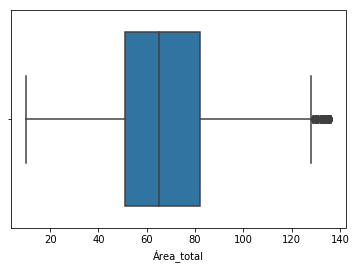

In [149]:
sns.boxplot(x='Área_total', data=imoveis_sem_outlier_4)

In [150]:
imoveis_sem_outlier_4.describe()

,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
count,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000
mean,1737.430129,378.094498,68.429001,68.813886,2.113485,1.095125,1.637862,0.180599,0.004700,0.195701,0.414024,0.112357,0.161988,0.002068,0.341083,0.089046,0.038163,0.511718,0.104587,0.105151,0.371475,0.058842,0.183168,0.371412,0.279797,0.011844,0.162740,0.391653,0.105527,0.069871,0.058090,0.019802,0.213749
std,827.696758,299.792859,83.280176,23.704468,0.747391,0.870351,0.743555,0.384698,0.068396,0.396752,0.492568,0.315816,0.368451,0.045429,0.474088,0.284819,0.191595,0.499878,0.306030,0.306758,0.483214,0.235336,0.386817,0.483198,0.448913,0.108185,0.369140,0.488135,0.307241,0.254937,0.233921,0.139324,0.409964
min,355.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1100.000000,80.000000,0.000000,51.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1600.000000,370.000000,44.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2300.000000,572.000000,111.000000,82.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4400.000000,1374.000000,367.000000,136.000000,5.000000,30.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
# Resetando o index
imoveis_clean_base = imoveis_sem_outlier_4.reset_index(drop=True)

-------------------------------------------------------------------------------------------------------------

### Salvando o resultado do dataset em um arquivo csv

In [166]:
imoveis_clean_base.to_csv('imoveis_clean_base.csv')

---------------------------------------------------------------

# Conclusão

Apesar de termos feito alguns pré processamentos, a nossa base de dados já veio muito bem organizada e limpa, tivemos que fazer alguns detalhes mais nada muito complicado, essa é uma das vantagens do webscraping, ao mesmo tempo que estavamos pegando os dados do site nós já estavamos fazendo um pré processamento junto do webscraping.

Inicialmente nosso dataset perdeu muitos dados devido aos valores missing's e possíveis valores outliers.

Eu escolhi fazer esses pré processamentos pois os algoritmos de machine learning são sensíveis aos outliers e acabei usando também alguns critério lógicos, por exemplo, nós tinhamos na base de dados imóveis com valores de aluguel igual à 2.000.000, valores de condomínio igual ou superior à 50 mil e valores de iptu e área total que são valores surreais para imóveis do tipo apartamento.

Porém podemos também depois que fizermos nosso modelo de machine learning, voltar nessa etapa do projeto e mudarmos nosso tipo de pré processamento, usando outras técnicas, limpezas e transformações afim de medir as métricas para melhora do modelo.